In [67]:
import pyspark
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns

In [68]:
# initialize sparksession
spark = SparkSession.builder.appName('EXAMPLE_APP').getOrCreate()

In [69]:
""""
Create a dataset in PySpark with 10 rows and columns dummy_patient: integer, dummy_diag: string, dummy_date: date, dummy_time: HH:MM:SS and dumy_data_source,F.lit( 'dummy_dataset_1')
"""

# Create a dataframe with 10 rows and 5 columns
df_1 = spark.createDataFrame(
    [(1, 'A', '2020-01-01', '00:00:00', 'dummy_dataset_1'),
     (2, 'B', '2020-01-02', '00:00:00', 'dummy_dataset_1'),
     (3, 'C', '2020-01-03', '00:00:00', 'dummy_dataset_1'),
     (4, 'D', '2020-01-04', '00:00:00', 'dummy_dataset_1'),
     (5, 'E', '2020-01-05', '00:00:00', 'dummy_dataset_1'),
     (6, 'F', '2020-01-06', '00:00:00', 'dummy_dataset_1'),
     (7, 'G', '2020-01-07', '00:00:00', 'dummy_dataset_1'),
     (8, 'H', '2020-01-08', '00:00:00', 'dummy_dataset_1'),
     (9, 'I', '2020-01-09', '00:00:00', 'dummy_dataset_1'),
     (10, 'J', '2020-01-10', '00:00:00', 'dummy_dataset_1')],
    ['dummy_patient', 'dummy_diag', 'dummy_date_1', 'dummy_time_1', 'dummy_data_source']
)

""""
Create a dataset in PySpark with 10 rows and columns dummy_patient: integer, dummy_len_of_stay: string, dummy_admi_sorc: data,dummy_date: date, dummy_time: HH:MM:SS and dumy_data_source,F.lit( 'dummy_dataset_2')
"""

# Create a dataframe with 10 rows and 6 columns
df_2 = spark.createDataFrame(
    [(1, 9, 'A', '2020-01-01', '00:00:00', 'dummy_dataset_2'),
     (2, 7,'B', '2020-01-02', '00:00:00', 'dummy_dataset_2'),
     (3, 4,'C', '2020-01-03', '00:00:00', 'dummy_dataset_2'),
     (4, 10,'D', '2020-01-04', '00:00:00', 'dummy_dataset_2'),
     (5, 45,'E', '2020-01-05', '00:00:00', 'dummy_dataset_2'),
     (6, 17,'F', '2020-01-06', '00:00:00', 'dummy_dataset_2'),
     (7, 11, 'G', '2020-01-07', '00:00:00', 'dummy_dataset_2'),
     (8, 23,'H', '2020-01-08', '00:00:00', 'dummy_dataset_2'),
     (9, 31,'I', '2020-01-09', '00:00:00', 'dummy_dataset_2'),
     (10,20, 'J', '2020-01-10', '00:00:00', 'dummy_dataset_2')],
    ['dummy_patient', 'dummy_len_of_stay', 'dummy_admi_sorc', 'dummy_date_2', 'dummy_time_2', 'dummy_data_source']
)

In [70]:
"""
Using a PySpark, Join the last two datasets together on dummy_patient.
"""

# Join the two dataframes together on dummy_patient
df = df_1.join(df_2, on='dummy_patient')

df.show(5)


+-------------+----------+------------+------------+-----------------+-----------------+---------------+------------+------------+-----------------+
|dummy_patient|dummy_diag|dummy_date_1|dummy_time_1|dummy_data_source|dummy_len_of_stay|dummy_admi_sorc|dummy_date_2|dummy_time_2|dummy_data_source|
+-------------+----------+------------+------------+-----------------+-----------------+---------------+------------+------------+-----------------+
|            1|         A|  2020-01-01|    00:00:00|  dummy_dataset_1|                9|              A|  2020-01-01|    00:00:00|  dummy_dataset_2|
|            2|         B|  2020-01-02|    00:00:00|  dummy_dataset_1|                7|              B|  2020-01-02|    00:00:00|  dummy_dataset_2|
|            3|         C|  2020-01-03|    00:00:00|  dummy_dataset_1|                4|              C|  2020-01-03|    00:00:00|  dummy_dataset_2|
|            4|         D|  2020-01-04|    00:00:00|  dummy_dataset_1|               10|              D|  

In [71]:
"""
Using a PySpark, calculate summary statistics.
"""

# Calculate summary statistics
df.describe().show()

+-------+------------------+----------+------------+------------+-----------------+------------------+---------------+------------+------------+-----------------+
|summary|     dummy_patient|dummy_diag|dummy_date_1|dummy_time_1|dummy_data_source| dummy_len_of_stay|dummy_admi_sorc|dummy_date_2|dummy_time_2|dummy_data_source|
+-------+------------------+----------+------------+------------+-----------------+------------------+---------------+------------+------------+-----------------+
|  count|                10|        10|          10|          10|               10|                10|             10|          10|          10|               10|
|   mean|               5.5|      null|        null|        null|             null|              17.7|           null|        null|        null|             null|
| stddev|3.0276503540974917|      null|        null|        null|             null|12.640762986817247|           null|        null|        null|             null|
|    min|             

In [72]:
"""
Convert df to a pandas dataframe and plot a graph using seaborn with x= 'dummy_date' and y = 'dummy_len_of_stay', hue = 'dummy_admi_sorc'.
"""

# Convert df to a pandas dataframe
df_pandas = df.toPandas()


In [73]:
df_pandas.head()

,dummy_patient,dummy_diag,dummy_date_1,dummy_time_1,dummy_data_source,dummy_len_of_stay,dummy_admi_sorc,dummy_date_2,dummy_time_2,dummy_data_source
0,1,A,2020-01-01,00:00:00,dummy_dataset_1,9,A,2020-01-01,00:00:00,dummy_dataset_2
1,2,B,2020-01-02,00:00:00,dummy_dataset_1,7,B,2020-01-02,00:00:00,dummy_dataset_2
2,3,C,2020-01-03,00:00:00,dummy_dataset_1,4,C,2020-01-03,00:00:00,dummy_dataset_2
3,4,D,2020-01-04,00:00:00,dummy_dataset_1,10,D,2020-01-04,00:00:00,dummy_dataset_2
4,5,E,2020-01-05,00:00:00,dummy_dataset_1,45,E,2020-01-05,00:00:00,dummy_dataset_2


In [74]:
df_pandas.describe()

,dummy_patient,dummy_len_of_stay
count,10.00000,10.000000
mean,5.50000,17.700000
std,3.02765,12.640763
min,1.00000,4.000000
25%,3.25000,9.250000
50%,5.50000,14.000000
75%,7.75000,22.250000
max,10.00000,45.000000


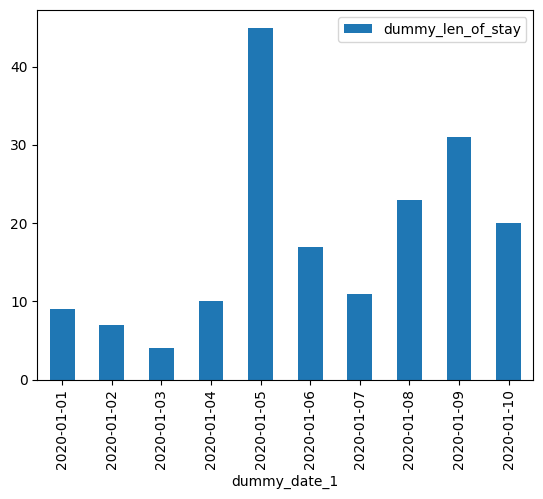

In [75]:
df_pandas.set_index('dummy_date_1')[['dummy_len_of_stay']].plot(kind='bar', stacked=True, rot=90);